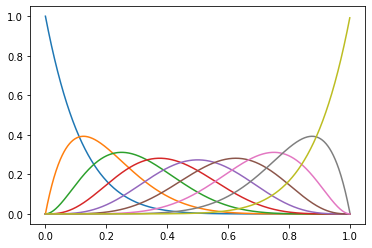

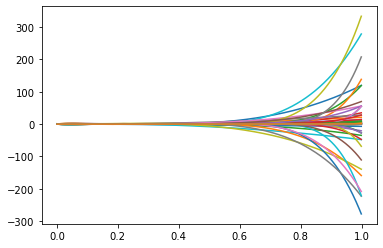

In [8]:
import sympy as sym 
import numpy
import pylab
import time

def lagrange_series(N): 
    psi = []
    #  h = Rational(1, N)
    h = 1.0/N
    points = [i*h for i in range(N+1)]
    for i in range(len(points)): 
        p = 1 
        for k in range(len(points)): 
            if k != i:
                p *= (x - points[k])/(points[i] - points[k])
                psi.append(p)
    #  psi = psi[1:-1]
    return psi

def bernstein_series(N): 
    # FIXME: check if a normalization constant is common in the definition 
    # advantage is that the basis is always positive 
    psi = []
    for k in range(0,N+1): 
    #  for k in range(1,N):  # bc elsewhere  
        psi_k = sym.binomial(N, k)*x**k*(1-x)**(N-k)  
        psi.append(psi_k)
    return psi


def sin_series(N): 
  # FIXME: do not satisfy bc  
  psi = []
  for k in range(1,N): 
    psi_k = sin(pi*k*x)
    psi.append(psi_k)
  return psi

def taylor_series(N): 
  # FIXME: do not satisfy bc  
  print("Cannot with current BC implementation") 
  return 
  psi = []
  for k in range(1,N): 
    psi_k = x**k 
    psi.append(psi_k)
  return psi

def series(series_type, N): 
  if series_type=="Taylor" : return taylor_series(N) # cannot do with current implementation of bc
  elif series_type=="sin"  : return sin_series(N)
  elif series_type=="Bernstein"  : return bernstein_series(N)
  elif series_type=="Lagrange"  : return lagrange_series(N)
  else: print("series type unknown ") # sys.exit(0)



x = sym.Symbol("x")

h= 0.001
X = numpy.arange(0, 1, h)
psi = series("Bernstein", 8)
for i in range(len(psi)): 
  psii = sym.lambdify([x], psi[i])
  psiii = psii(X)
  pylab.plot(X, psiii)
pylab.show()

psi = series("Lagrange", 8)
for i in range(len(psi)): 
  psii = sym.lambdify([x], psi[i])
  psiii = psii(X)
  pylab.plot(X, psiii)
pylab.show()



